# Machine Learning

In this part we will assess ML model

# Modeling with Extracted Features from EDA

- Linear Regression
- Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data=pd.read_csv('../dataset/extracted/feature_extracted.csv')
# data=pd.read_csv('../dataset/processed/cleanedData.csv')
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,...,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,isUnitedStates,CountryRank,IsEnglish,keywordRank,cerRank
0,Star Wars: Episode VII - The Force Awakens,2488496,245000000,"['Daisy Ridley', 'John Boyega', 'Oscar Isaac',...","['Lawrence Kasdan', 'Michael Arndt', 'J.J. Abr...","['Lucasfilm', 'Bad Robot', 'Truenorth Producti...","['Action', 'Adventure', 'Sci-Fi']","['reboot', 'sanitation employee', 'remake', 'c...",['English'],['United States'],...,1,3,1318,2,1,1,6,1,99.8,5
1,Frozen II,4520988,150000000,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...","['Jennifer Lee', 'Hans Christian Andersen', 'C...","['Walt Disney Animation Studios', 'Walt Disney...","['Animation', 'Adventure', 'Comedy', 'Family',...","['autumn', 'anthropomorphic snowman', 'princes...",['English'],['United States'],...,1,2,1126,2,1,1,6,1,141.6,4


Drop **str** column

In [2]:
for index in data.columns:
    if type(data[index][0])== str:
        data=data.drop(index,axis=1)
# Drop Movie_ID, Rating, Rating_Count
data.drop(['Movie_ID','Rating','Rating_Count','Release_Day','Release_Month'],axis=1,inplace=True)
data.head(2)

,Budget,Runtime,Gross_worldwide,Release_Year,GenreRank,IsAdventure,SpecialMonth,CastsRank,NumLeadActors,HasTop50Actors,...,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,isUnitedStates,CountryRank,IsEnglish,keywordRank,cerRank
0,245000000,138.0,2069521700,2015,19.666667,1,1,58145,8,1,...,1,3,1318,2,1,1,6,1,99.8,5
1,150000000,103.0,1450026933,2019,17.333333,1,1,41021,2,0,...,1,2,1126,2,1,1,6,1,141.6,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8752 entries, 0 to 8751
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Budget           8752 non-null   int64  
 1   Runtime          8752 non-null   float64
 2   Gross_worldwide  8752 non-null   int64  
 3   Release_Year     8752 non-null   int64  
 4   GenreRank        8752 non-null   float64
 5   IsAdventure      8752 non-null   int64  
 6   SpecialMonth     8752 non-null   int64  
 7   CastsRank        8752 non-null   int64  
 8   NumLeadActors    8752 non-null   int64  
 9   HasTop50Actors   8752 non-null   int64  
 10  NumCrews         8752 non-null   int64  
 11  crewsTeamRank    8752 non-null   int64  
 12  NumTopCrew       8752 non-null   int64  
 13  HasTopCrew       8752 non-null   int64  
 14  NumStudios       8752 non-null   int64  
 15  StudioRank       8752 non-null   int64  
 16  NumTopStudios    8752 non-null   int64  
 17  HasTopStudio  

Correlation Plot

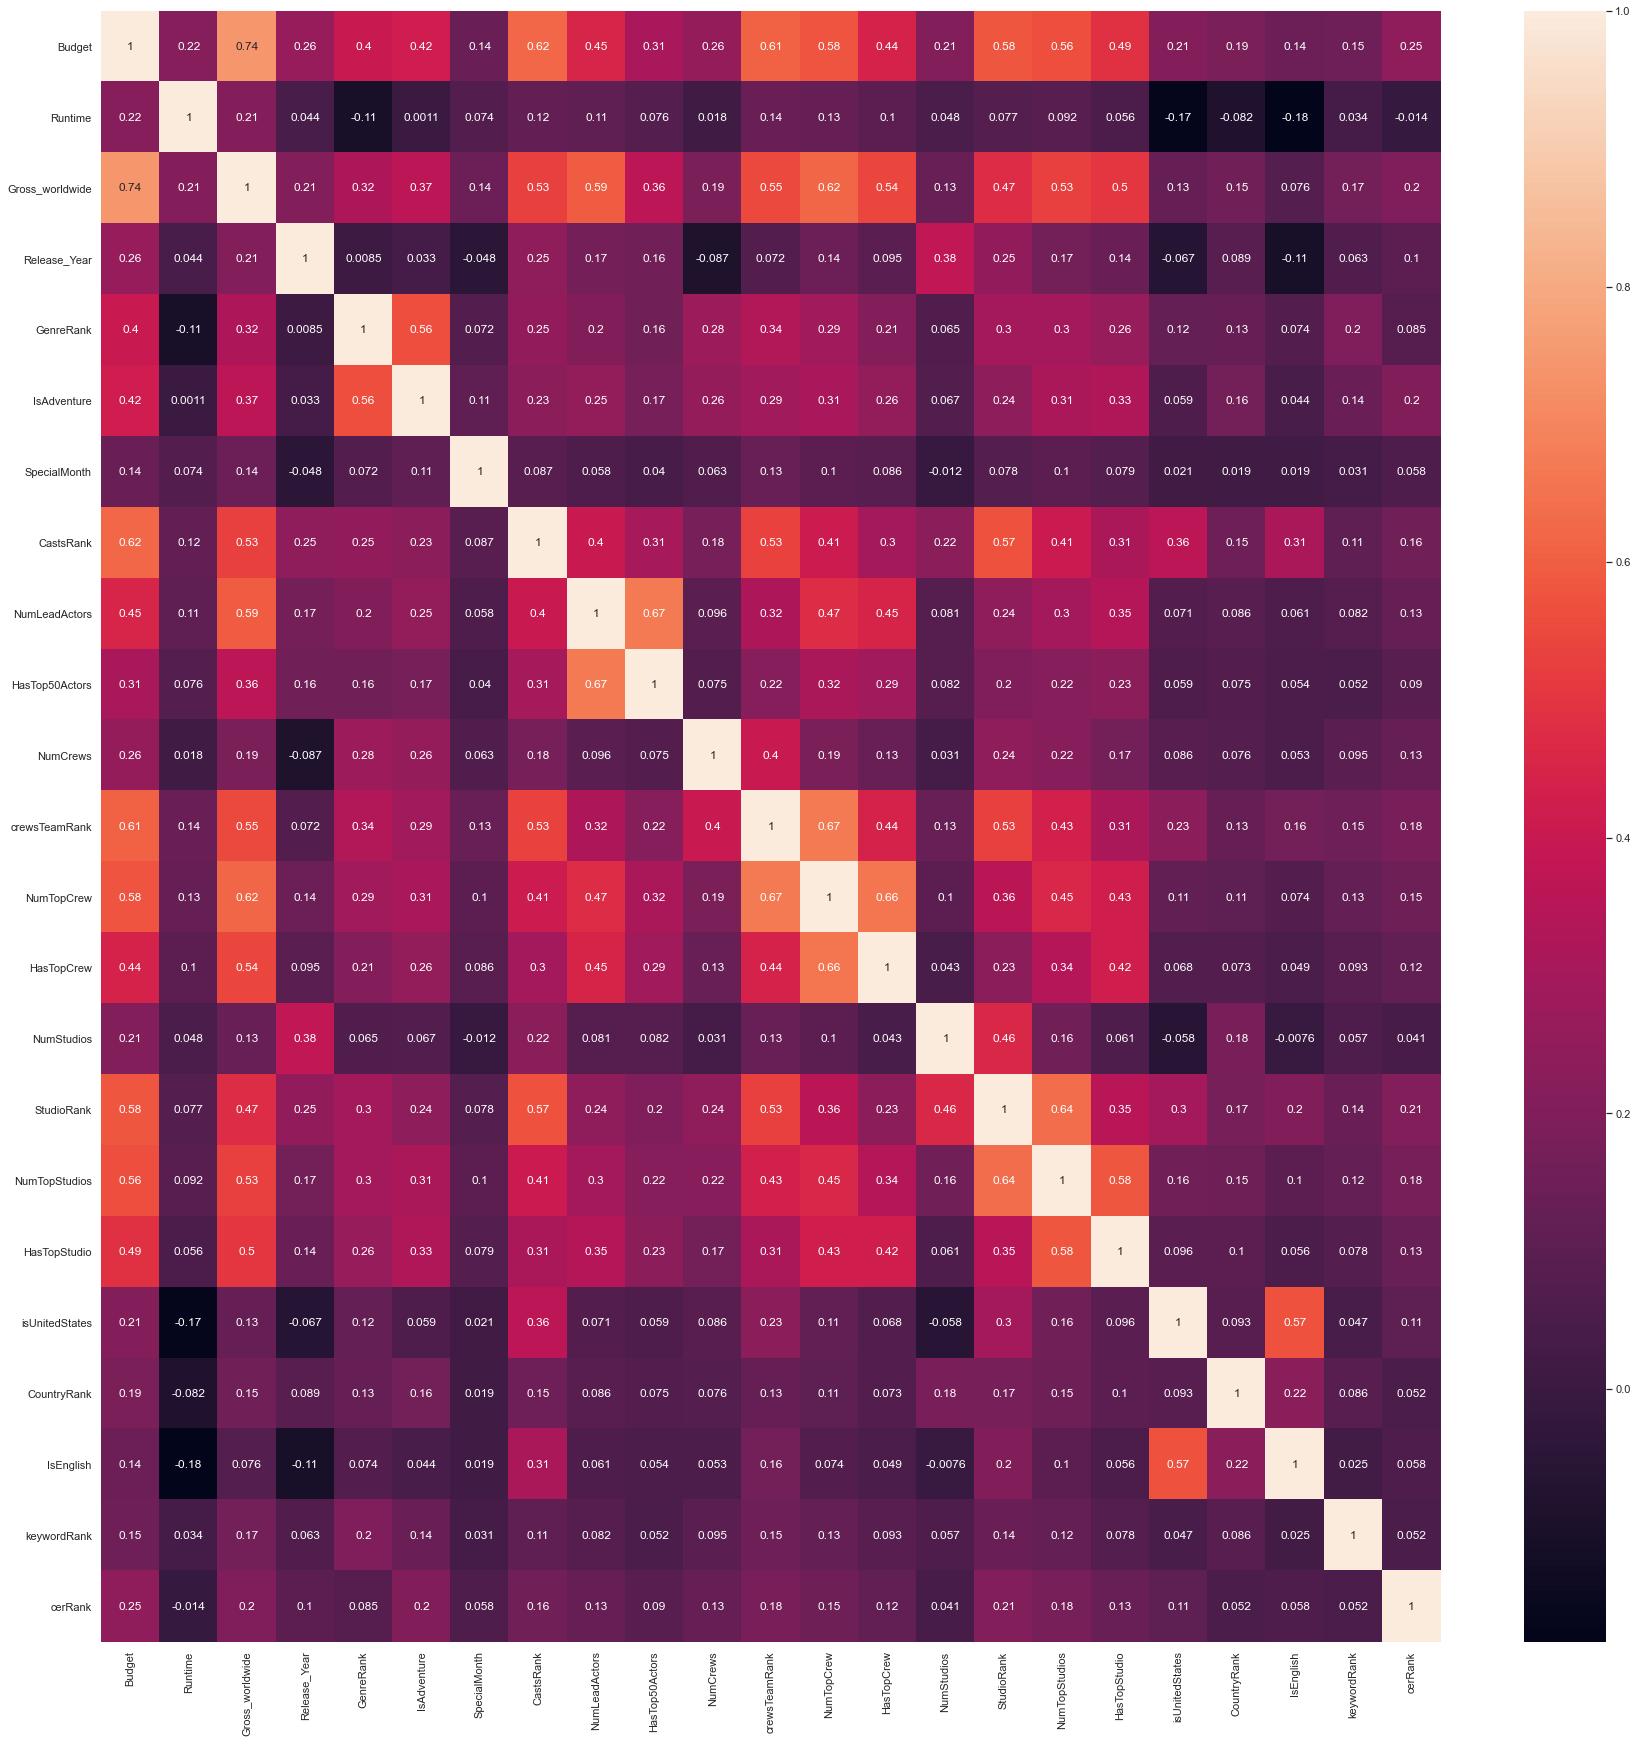

In [7]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)
plt.show()

Top correlation with **Gross_worldwide**

In [8]:
data.corr()['Gross_worldwide'].sort_values(ascending=False)

Gross_worldwide    1.000000
Budget             0.741255
NumTopCrew         0.620654
NumLeadActors      0.593344
crewsTeamRank      0.550499
HasTopCrew         0.543905
NumTopStudios      0.529891
CastsRank          0.525997
HasTopStudio       0.503802
StudioRank         0.473395
IsAdventure        0.366146
HasTop50Actors     0.363827
GenreRank          0.321851
Runtime            0.210073
Release_Year       0.209071
cerRank            0.199208
NumCrews           0.190015
keywordRank        0.165464
CountryRank        0.154301
SpecialMonth       0.141635
NumStudios         0.133288
isUnitedStates     0.128513
IsEnglish          0.075937
Name: Gross_worldwide, dtype: float64

In [5]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [6]:
data.columns

Index(['Budget', 'Runtime', 'Gross_worldwide', 'Release_Year', 'GenreRank',
       'SpecialMonth', 'CastsRank', 'NumLeadActors', 'HasTop50Actors',
       'NumCrews', 'crewsTeamRank', 'NumTopCrew', 'HasTopCrew', 'NumStudios',
       'StudioRank', 'NumTopStudios', 'HasTopStudio', 'CountryRank',
       'keywordRank', 'cerRank'],
      dtype='object')

## Linear Regression

- With out feature engineering

In [7]:
testScore=0
trainScore=0
mae_val=0
mae_train=0
loop=1000
for i in range(loop):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    target=['Gross_worldwide']
    feature=['Budget','Runtime','Release_Year']
    x_train = train[feature]
    y_train = train[target]
    x_test = test[feature]
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    trainScore+=lin.score(x_train,y_train)
    mae_train+=mean_absolute_error(y_train,lin.predict(x_train))
    mae_val+=mean_absolute_error(y_test,y_predicted)
else:
    testScore/=loop
    trainScore/=loop
    mae_val/=loop
    mae_train/=loop
print("Average train score: %.2f" %trainScore)
print("Average test score: %.2f" %testScore) 

print("MAE Train: ",mae_train)
print("MAE Test: ",mae_val)

Average train score: 0.55
Average test score: 0.55
MAE Train:  51471190.73044831
MAE Test:  51500081.133756585


Mean MAE of test set with 1000 loops is 52M$ ~ 1200 Tỷ VND

- With feature engineering

In [13]:
testScore=0
trainScore=0
mae_val=0
mae_train=0
loop=100
for i in range(loop):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    target=['Gross_worldwide']
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    trainScore+=lin.score(x_train,y_train)
    mae_train+=mean_absolute_error(y_train,lin.predict(x_train))
    mae_val+=mean_absolute_error(y_test,y_predicted)
else:
    testScore/=loop
    trainScore/=loop
    mae_val/=loop
    mae_train/=loop
print("Average train score: %.2f" %trainScore)
print("Average test score: %.2f" %testScore) 

print("MAE Train: ",mae_train)
print("MAE Test: ",mae_val)

Average train score: 0.69
Average test score: 0.68
MAE Train:  45738206.3610779
MAE Test:  46006682.803338155


Mean MAE of test set with 1000 loops is 46M$ ~ 1050 Tỷ VND

## Random Forest

- With feature engineering

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor

lin=RandomForestRegressor(n_estimators=1000)
train, test = train_test_split(data,test_size=0.3)
target=['Gross_worldwide']
x_train = train.drop('Gross_worldwide',axis=1)
y_train = train[target]
x_test = test.drop('Gross_worldwide',axis=1)
y_test = test[target]
lin.fit(x_train,y_train)
y_predicted= lin.predict(x_test)
testScore=lin.score(x_test,y_test)
trainScore=lin.score(x_train,y_train)
mae_val=mean_absolute_error(y_test,y_predicted)
mae_val_train=mean_absolute_error(y_train,lin.predict(x_train))
print("Average train score: %.2f" %trainScore) 
print("Average test score: %.2f" %testScore) 
print("MAE train: ",mae_val_train)
print("MAE test: ",mae_val)


Average train score: 0.96
Average test score: 0.67
MAE train:  14751209.1094334
MAE test:  39308393.943074636


Mean MAE of test 38M$ ~ 870 Tỷ Vietnam Dong

# Modeling with Extracted Features in Training

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data=pd.read_csv('../dataset/processed/cleaned_data.csv')
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,Release_Data,Runtime,Gross_worldwide,Rating,Rating_Count,ListOfCertificate,Release_Year,Release_Month,Release_Day
0,Star Wars: Episode VII - The Force Awakens,2488496,245000000,"['Daisy Ridley', 'John Boyega', 'Oscar Isaac',...","['Lawrence Kasdan', 'Michael Arndt', 'J.J. Abr...","['Lucasfilm', 'Bad Robot', 'Truenorth Producti...","['Action', 'Adventure', 'Sci-Fi']","['reboot', 'sanitation employee', 'remake', 'c...",['English'],['United States'],2015-12-18,138.0,2069521700,7.8,893000,['PG-13'],2015,12,18
1,Frozen II,4520988,150000000,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...","['Jennifer Lee', 'Hans Christian Andersen', 'C...","['Walt Disney Animation Studios', 'Walt Disney...","['Animation', 'Adventure', 'Comedy', 'Family',...","['autumn', 'anthropomorphic snowman', 'princes...",['English'],['United States'],2019-11-22,103.0,1450026933,6.8,156000,['PG'],2019,11,22


## Initialization

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from FeatureExtractor import BORFeatureExtractor
from sklearn.preprocessing import MinMaxScaler

In [7]:
import ast
cols =['Cast', 'Genre', 'Studios', 'ListOfCertificate','Keywords', 'Languages', 'Countries','Crew']
for col in cols:
    data[col]=data[col].apply(ast.literal_eval)

## Linear Regression

In [14]:
testScore=0
trainScore=0
mae_val=0
mae_train=0
loop=10
for i in range(loop):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.2)
    train.reset_index(drop=True,inplace=True)
    test.reset_index(drop=True,inplace=True)
    fe=BORFeatureExtractor()
    fe.fit(train)
    fe.extract(train)
    fe.extract(test)
    target=['Gross_worldwide']
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    trainScore+=lin.score(x_train,y_train)
    mae_train+=mean_absolute_error(y_train,lin.predict(x_train))
    mae_val+=mean_absolute_error(y_test,y_predicted)
else:
    testScore/=loop
    trainScore/=loop
    mae_val/=loop
    mae_train/=loop
print("Average train score: %.2f" %trainScore)
print("Average test score: %.2f" %testScore) 

print("MAE Train: ",mae_train)
print("MAE Test: ",mae_val)

Average train score: 0.68
Average test score: 0.60
MAE Train:  46356356.70140405
MAE Test:  49828320.538571715


Since it takes time to extract feature while running so we run only 10 time.

The result is MAE on test is **48M $**

Now we will see Linear Regression give how much coeficient on Data

In [17]:
testScore=0
trainScore=0
mae_val=0
mae_train=0
loop=1
for i in range(loop):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.2)
    train.reset_index(drop=True,inplace=True)
    test.reset_index(drop=True,inplace=True)
    fe=BORFeatureExtractor()
    scale=MinMaxScaler()
    fe.fit(train)
    fe.extract(train)
    fe.extract(test)
    target=['Gross_worldwide']
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test[target]
    columns=list(x_train.columns)
    scale=scale.fit(x_train)
    x_train=scale.transform(x_train)
    x_test=scale.transform(x_test)
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    trainScore+=lin.score(x_train,y_train)
    mae_train+=mean_absolute_error(y_train,lin.predict(x_train))
    mae_val+=mean_absolute_error(y_test,y_predicted)
else:
    testScore/=loop
    trainScore/=loop
    mae_val/=loop
    mae_train/=loop
print("Average train score: %.2f" %trainScore)
print("Average test score: %.2f" %testScore) 

print("MAE Train: ",mae_train)
print("MAE Test: ",mae_val)

Average train score: 0.67
Average test score: 0.68
MAE Train:  46674409.30678001
MAE Test:  48715739.99336273


Now conduct a coefficient table for each attributes to see what are the best predictors

In [18]:
coef_df=pd.DataFrame(np.abs(lin.coef_).T,columns=['Coef'],index=columns)
coef_df.sort_values(by='Coef',ascending=False)

,Coef
NumLeadActors,8.471749e+08
Budget,4.977656e+08
Runtime,1.328277e+08
NumTopCrew,1.320442e+08
HasTopCrew,8.910902e+07
HasTopStudio,5.895801e+07
CastsRank,4.417584e+07
NumStudios,4.387979e+07
HasTop50Actors,3.619633e+07
StudioRank,3.287696e+07


## Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

lin=RandomForestRegressor(n_estimators=1000)
train, test = train_test_split(data,test_size=0.3)
## Extract feature
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
fe=BORFeatureExtractor()
fe.fit(train)
fe.extract(train)
fe.extract(test)
## 
target=['Gross_worldwide']
x_train = train.drop('Gross_worldwide',axis=1)
y_train = train[target]
x_test = test.drop('Gross_worldwide',axis=1)
y_test = test[target]
lin.fit(x_train,y_train)
y_predicted= lin.predict(x_test)
testScore=lin.score(x_test,y_test)
trainScore=lin.score(x_train,y_train)
mae_val=mean_absolute_error(y_test,y_predicted)
mae_val_train=mean_absolute_error(y_train,lin.predict(x_train))
print("Average train score: %.2f" %trainScore) 
print("Average test score: %.2f" %testScore) 
print("MAE train: ",mae_val_train)
print("MAE test: ",mae_val)

Average train score: 0.96
Average test score: 0.66
MAE train:  14927973.37474992
MAE test:  41318197.17950952


We run only 1 time with 1000 estimators.

The result is MAE on test is **43M $**